In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [2]:
with open('./embeddings/embeddings_all_l0.9.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"].cpu().numpy()
y = data["labels"].cpu().numpy()
print(y.shape)

(49984,)


In [3]:
# average together all the embeddings for each class

# get the unique labels

unique_labels = np.unique(y)
print(unique_labels)

# get the average embedding for each class
avg_embeddings = []

for label in unique_labels:
    avg_embeddings.append(np.mean(x[y == label], axis=0))

avg_embeddings = np.array(avg_embeddings)
print(avg_embeddings.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
(100, 344)


In [11]:
#use PCA to reduce dimension

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

x_pca = pca.fit_transform(avg_embeddings)

print(x_pca)


[[-1.2084696  -3.9850075 ]
 [-4.3428545   1.8218313 ]
 [-5.533307   -4.2634797 ]
 [ 1.7244084   4.858438  ]
 [-1.3051552   8.392671  ]
 [-1.4783727  -2.8194315 ]
 [-5.083552   -1.1191314 ]
 [-4.6169243   0.35625547]
 [-2.5916445  -1.9988606 ]
 [-0.58775955 -5.302288  ]
 [-3.2350464  -4.283309  ]
 [-3.5609329  -5.5082855 ]
 [ 8.520087   -0.66839105]
 [ 3.6729271  -4.380632  ]
 [-7.0004034  -0.682228  ]
 [ 2.7894704   0.3013097 ]
 [-2.375241   -4.6766114 ]
 [ 6.9037523  -2.0860155 ]
 [-3.2149389   2.3432033 ]
 [ 2.9917219  -0.4421726 ]
 [-3.80611    -2.533616  ]
 [-0.06451782  2.145517  ]
 [-1.4254146  -2.86435   ]
 [ 7.6450896   0.7138932 ]
 [-3.9299855  -1.476507  ]
 [-1.5425497  -3.0036483 ]
 [-6.588196   -0.42769796]
 [-0.5043259   8.812655  ]
 [-1.2744118  -3.9453425 ]
 [-1.4636639   2.7148716 ]
 [ 2.7756045   7.276275  ]
 [ 4.1201215   1.0559644 ]
 [-1.936332    1.5954201 ]
 [ 5.7399893   0.8175381 ]
 [-1.1183305   3.7438738 ]
 [-3.1391027  -5.0866003 ]
 [-3.1482089   0.9502571 ]
 

(100,)


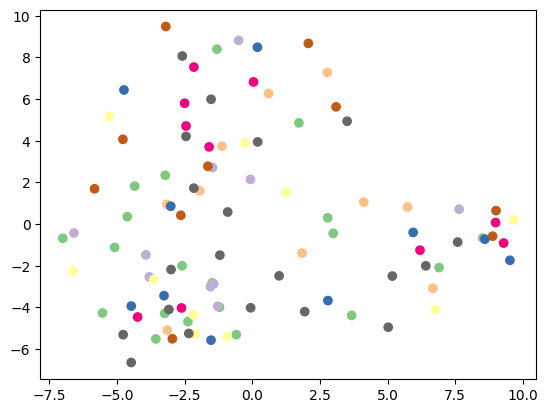

aquatic : 0
plants : 1
food : 2
houshold : 3
insects : 4
outdoor_scenes : 5
large_animals : 6
medium_animals : 7
vehicles : 8
other : 9


IndexError: list index out of range

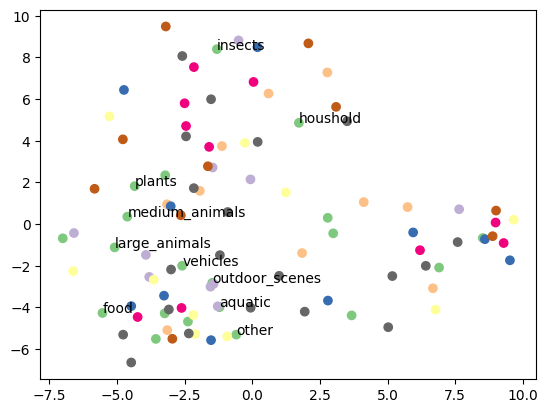

In [18]:

clustering_mapping = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 3, 31: 3, 32: 3, 33: 3, 34: 3, 35: 3, 36: 3, 37: 3, 38: 3, 39: 3, 40: 4, 41: 4, 42: 4, 43: 4, 44: 4, 45: 4, 46: 4, 47: 4, 48: 4, 49: 4, 50: 5, 51: 5, 52: 5, 53: 5, 54: 5, 55: 5, 56: 5, 57: 5, 58: 5, 59: 5, 60: 6, 61: 6, 62: 6, 63: 6, 64: 6, 65: 6, 66: 6, 67: 6, 68: 6, 69: 6, 70: 7, 71: 7, 72: 7, 73: 7, 74: 7, 75: 7, 76: 7, 77: 7, 78: 7, 79: 7, 80: 8, 81: 8, 82: 8, 83: 8, 84: 8, 85: 8, 86: 8, 87: 8, 88: 8, 89: 8, 90: 9, 91: 9, 92: 9, 93: 9, 94: 9, 95: 9, 96: 9, 97: 9, 98: 9, 99: 9}
classes = ["aquatic", "plants", "food", "houshold", "insects", "outdoor_scenes", "large_animals", "medium_animals", "vehicles", "other"]


# given the clustering mapping, map the labels to the clusters and assign a color to each cluster

colors = []
for label in unique_labels:
    colors.append(clustering_mapping[label])

colors = np.array(colors)
print(colors.shape)

# plot the clusters

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=colors, cmap='Accent')
plt.show()

# print which color correspond each class

for i in range(len(classes)):
    print(classes[i], ":", i)

# plot the clusters with the class names

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=colors, cmap='Accent')
for i in range(unique_labels):
    plt.annotate(classes[i], (x_pca[i, 0], x_pca[i, 1]))
plt.show()
